# 데이터 분석의 EDA와 p-value, kmean 의 사용법
### 대출등급 평가를 위한 데이터 분석

In [115]:
# file 불러 오기 및 pandas data frame 만들기
from glob import glob
import pandas as pd
#ipynb Notebook에 경고 표시 무시하기, 시가고화 하긴 library import 
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import warnings
# 한글 폰트 설정
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use("ggplot")

# Windows에 기본으로 탑재된 Malgun Gothic 폰트 설정
plt.rc('font', family='Malgun Gothic')

file_path = glob(r"C:\Users\bluecom013\Downloads\open\open\train.csv")

df = pd.read_csv(file_path[0])

df.head()


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [116]:
#data frame info 확인 + 결측치 확인
df.info()
#결측치 확인  -> df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [117]:
# 기술 통계량 출력
df.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [118]:
# 각 카테고리 변수의 unique 값 및 빈도수 확인
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}: {df[col].nunique()}")
    print(df[col].value_counts())


Unique values in ID: 96294
ID
TRAIN_00000    1
TRAIN_64192    1
TRAIN_64201    1
TRAIN_64200    1
TRAIN_64199    1
              ..
TRAIN_32096    1
TRAIN_32095    1
TRAIN_32094    1
TRAIN_32093    1
TRAIN_96293    1
Name: count, Length: 96294, dtype: int64

Unique values in 대출기간: 2
대출기간
 36 months    64479
 60 months    31815
Name: count, dtype: int64

Unique values in 근로기간: 16
근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

Unique values in 주택소유상태: 4
주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64

Unique values in 대출목적: 12
대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사

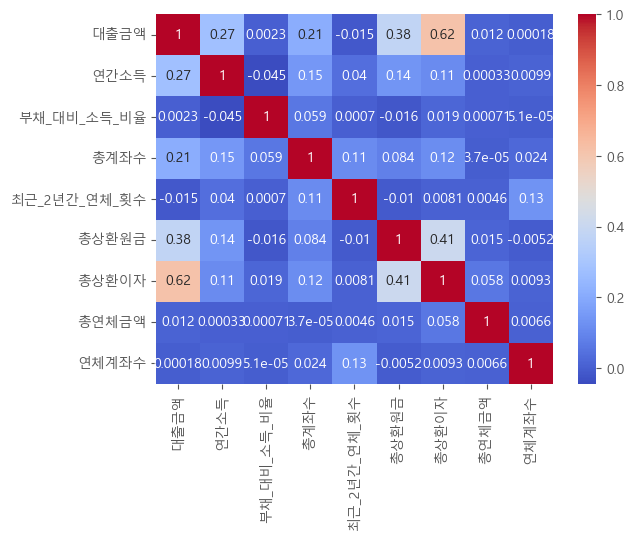

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [119]:
# 수치형 변수들 간의 상관 관계 시각화
import seaborn as sns


# 수치형 변수들 간의 상관 관계 시각화, 숫자 데이터
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

df.columns

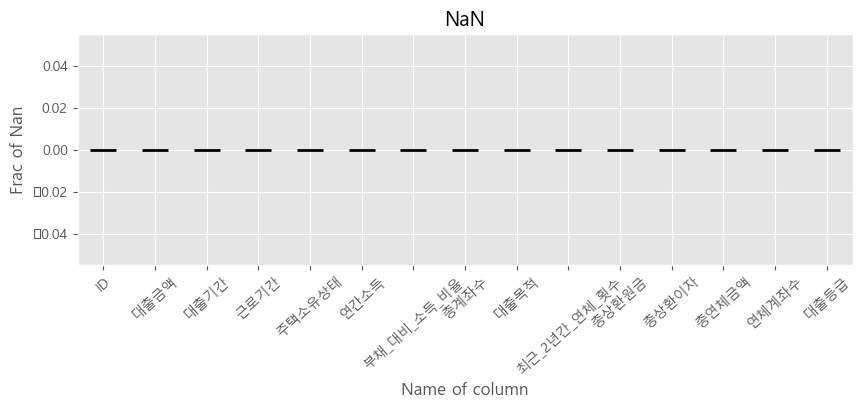

In [122]:
#결측치 없으므로 결측치 확인 부분 건너뛰기

df.isna().mean().sort_values(ascending=False).plot( kind='bar', figsize=(10,3),  grid=True, color='blue', edgecolor='black', linewidth=2, rot=42)
plt.title('NaN')
plt.xlabel('Name of column')
plt.ylabel('Frac of Nan')
plt.show()


In [131]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# 제외하는 것을 추천함
# Label Encoding을 적용할 열
columns_to_encode = ['대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급']

# LabelEncoder 객체 생성
label_encoders = {}
for col in columns_to_encode:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

# 정규화할 열 선택
print(list(df.columns))
columns_to_normalize = list(df.columns[1:])

# Min-Max Scaling을 적용할 데이터 복사본 생성
df_normalized = df.copy()

# Min-Max Scaling 적용
scaler = MinMaxScaler()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# 정규화된 데이터 확인
print("Normalized DataFrame:")
print(df_normalized.head())

# 각 카테고리 변수의 unique 값 및 빈도수 확인
for col, label_encoder in label_encoders.items():
    print(f"\nUnique values in {col}: {label_encoder.classes_}")
    print(df_normalized[col].value_counts())

['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급']
Normalized DataFrame:
            ID      대출금액  대출기간      근로기간    주택소유상태      연간소득  부채_대비_소득_비율  \
0  TRAIN_00000  0.276471   0.0  0.600000  1.000000  0.006667     0.001890   
1  TRAIN_00001  0.323529   1.0  0.133333  0.333333  0.012111     0.002233   
2  TRAIN_00002  0.264706   0.0  0.533333  0.333333  0.008889     0.000860   
3  TRAIN_00003  0.323529   0.0  0.733333  0.333333  0.012222     0.001509   
4  TRAIN_00004  0.411765   1.0  1.000000  1.000000  0.006642     0.002539   

       총계좌수      대출목적  최근_2년간_연체_횟수     총상환원금     총상환이자  총연체금액  연체계좌수  \
0  0.066667  0.090909           0.0  0.000000  0.000000    0.0    0.0   
1  0.103030  0.909091           0.0  0.008904  0.041402    0.0    0.0   
2  0.060606  0.090909           0.0  0.022134  0.026876    0.0    0.0   
3  0.066667  0.090909           0.0  0.007766  0.027082    0.0    0.0   
4  0.09090

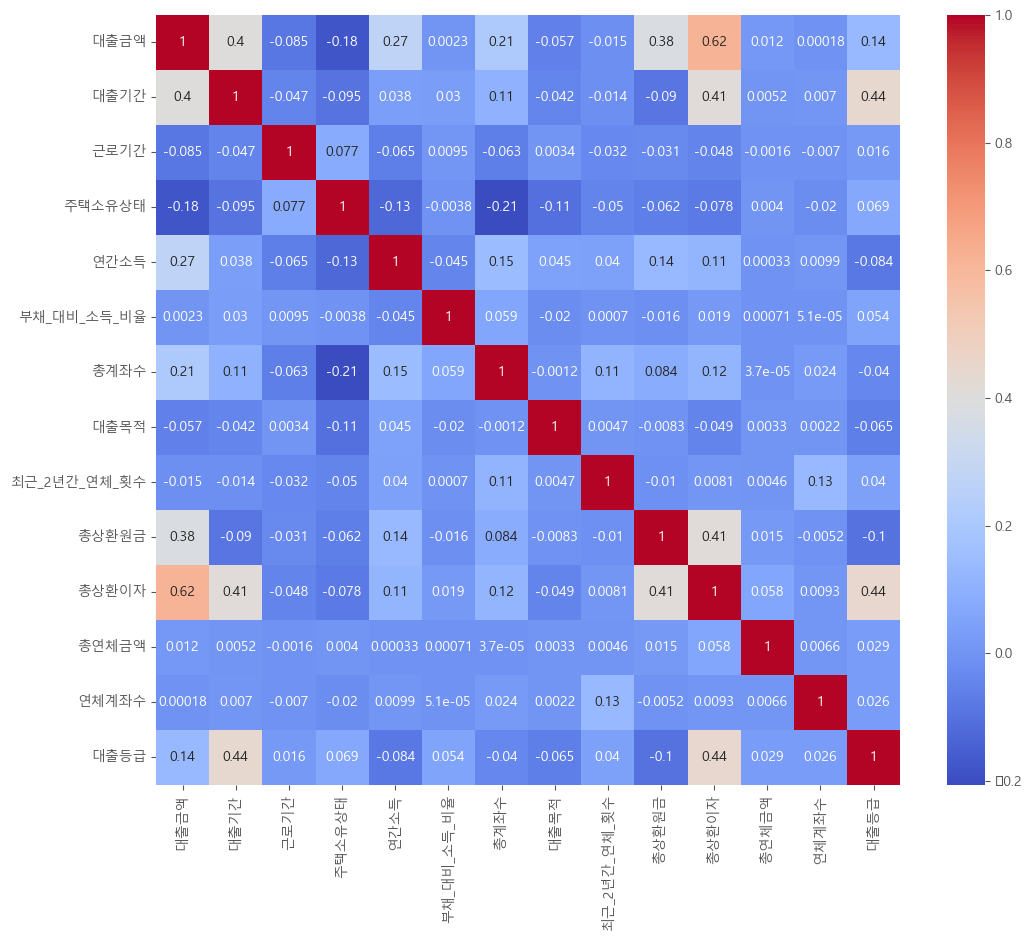

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [133]:
# 수치형 변수들 간의 상관 관계 시각화
numeric_columns = df_normalized.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_normalized[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

df_normalized.columns

In [161]:
from scipy.stats import pearsonr

# 'ID' 열을 제외한 열들로 데이터프레임 생성
df_without_id = df_normalized.iloc[:, 1:]

# 전체 데이터프레임의 열 간의 상관 관계와 p-value 계산
correlations = {}
p_values = {}

# 모든 열 쌍에 대해 상관 관계와 p-value 계산
for col1 in df_without_id.columns:
    correlations[col1] = {}
    p_values[col1] = {}
    for col2 in df_without_id.columns:
        corr, p_value = pearsonr(df_without_id[col1], df_without_id[col2])
        correlations[col1][col2] = corr
        p_values[col1][col2] = p_value

# 결과 출력 (예시로 상위 5x5 부분만 출력)
for col1 in df_without_id.columns[:5]:
    for col2 in df_without_id.columns[:5]:
        print(f"{col1} vs {col2} - Pearson Correlation: {correlations[col1][col2]}, p-value: {p_values[col1][col2]}")
print("-"*50)
#의미 없는 데이터 pvalue를 통해 알아내기
threshold_p_value = 0.05

significant_pairs = []
'''
for col1 in df_without_id.columns:
    for col2 in df_without_id.columns:
        if col1 != col2:
            p_value = p_values[col1][col2]
            if p_value < threshold_p_value:
                significant_pairs.append((col1, col2, p_value))
'''
# 결과 출력
for pair in significant_pairs:
    print(f"{pair[0]} vs {pair[1]} - p-value: {pair[2]}")


대출금액 vs 대출금액 - Pearson Correlation: 0.9999999999999156, p-value: 0.0
대출금액 vs 대출기간 - Pearson Correlation: 0.40257279400005075, p-value: 0.0
대출금액 vs 근로기간 - Pearson Correlation: -0.08499041218616936, p-value: 7.846083073042725e-154
대출금액 vs 주택소유상태 - Pearson Correlation: -0.178338388410404, p-value: 0.0
대출금액 vs 연간소득 - Pearson Correlation: 0.2739750745141695, p-value: 0.0
대출기간 vs 대출금액 - Pearson Correlation: 0.40257279400005075, p-value: 0.0
대출기간 vs 대출기간 - Pearson Correlation: 1.0, p-value: 0.0
대출기간 vs 근로기간 - Pearson Correlation: -0.04666052931200422, p-value: 1.4627215373050528e-47
대출기간 vs 주택소유상태 - Pearson Correlation: -0.09499358637370536, p-value: 7.804466752268755e-192
대출기간 vs 연간소득 - Pearson Correlation: 0.03839620758311116, p-value: 9.415049261299843e-33
근로기간 vs 대출금액 - Pearson Correlation: -0.08499041218616936, p-value: 7.846083073042725e-154
근로기간 vs 대출기간 - Pearson Correlation: -0.04666052931200422, p-value: 1.4627215373050528e-47
근로기간 vs 근로기간 - Pearson Correlation: 1.0, p-value: 0.0
근로기

In [159]:

def visualize_significant_pairs(dataframe, p_value_list, threshold_p_value=0.05):
    # 특정 임계값 이하의 p-value를 가진 열 쌍만 선택
    significant_pairs = [(col1, col2) for col1, col2, p_value in p_value_list if p_value < threshold_p_value]

    # Heatmap을 그릴 데이터프레임이 존재하는지 확인
    if significant_pairs:
        # Heatmap을 위한 데이터프레임 생성
        heatmap_data = dataframe[significant_pairs]

        # Heatmap 그리기
        plt.figure(figsize=(12, 10))
        sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
        plt.show()
    else:
        print("No significant pairs to visualize.")

# 함수 호출
visualize_significant_pairs(df_without_id, significant_pairs)

No significant pairs to visualize.


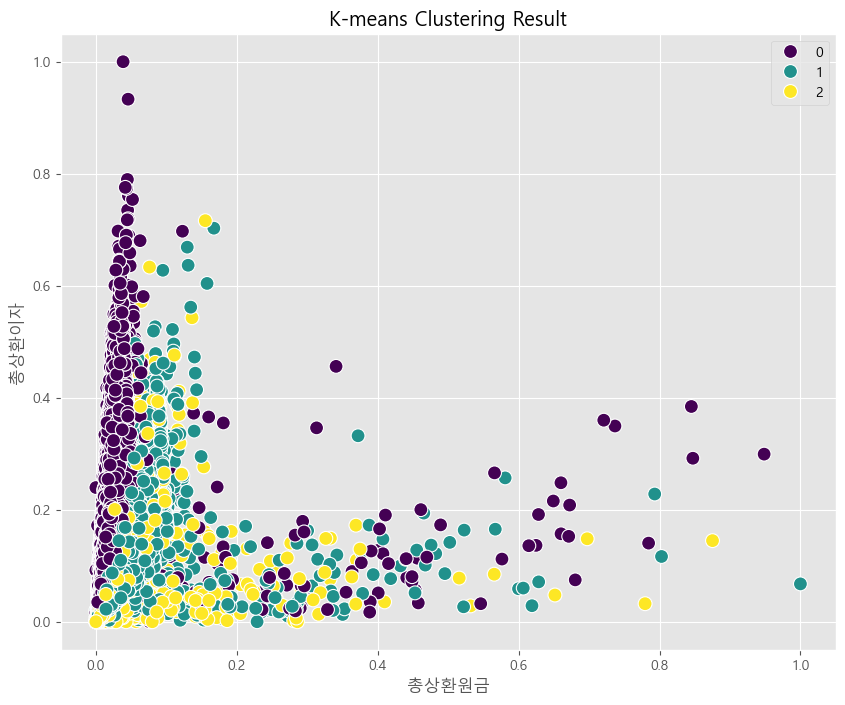

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# K-means 모델 학습
kmeans = KMeans(n_clusters=3)  # 예시로 3개의 클러스터로 설정
kmeans.fit(df_without_id)

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(x='총상환원금', y='총상환이자', data=df_without_id, hue=kmeans.labels_, palette='viridis', s=100)
plt.title('K-means Clustering Result')
plt.show()
